In [1]:
import os
import numpy as np
import pandas as pd
from scroutines.config_plots import *

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt186/proc/r1'
n5dir = '/u/home/f/f7xiesnm/project-zipursky/easifish/lt186/r1/stitching/export.n5'
f1 = os.path.join(ddir, 'roi.csv')
f2 = os.path.join(ddir, 'spotcount_intn.csv')

In [3]:
df1 = pd.read_csv(f1, index_col=0)
df2 = pd.read_csv(f2, index_col=0)
df  = df1.join(df2)

In [4]:
df

z           y           x         area       r1_c0     r1_c2
roi                                                                         
1      223.381698  118.023524  345.738751  2663.316096   17.491755  0.000000
2      168.712415  365.227001  155.285191  3824.339904  102.904160  0.000000
3      354.251797  140.049249  504.988163  2813.332032    0.000000  0.000000
4      498.298442  165.682851   64.912608  2573.733120    0.000000  0.000000
5      181.096767   71.323709  379.952383  3434.725056   16.685709  0.000000
...           ...         ...         ...          ...         ...       ...
28224   82.788737  479.759067  898.320341  1249.895808    0.000000  0.204618
28225  280.886322  481.080502  796.140414   962.661504    4.162264  0.193809
28226  317.530425  538.178367  492.551535  1088.504256    0.000000  0.000000
28227   92.072529  253.880894  134.486927  2927.088192    0.000000  0.000000
28228  229.877528  308.873387  182.145233   885.876096    5.190854  0.000000

[28228 rows x 6 columns]

In [5]:
cond = ((df['area'] < 1000) & (df['area'] > 100))
df = df[cond]

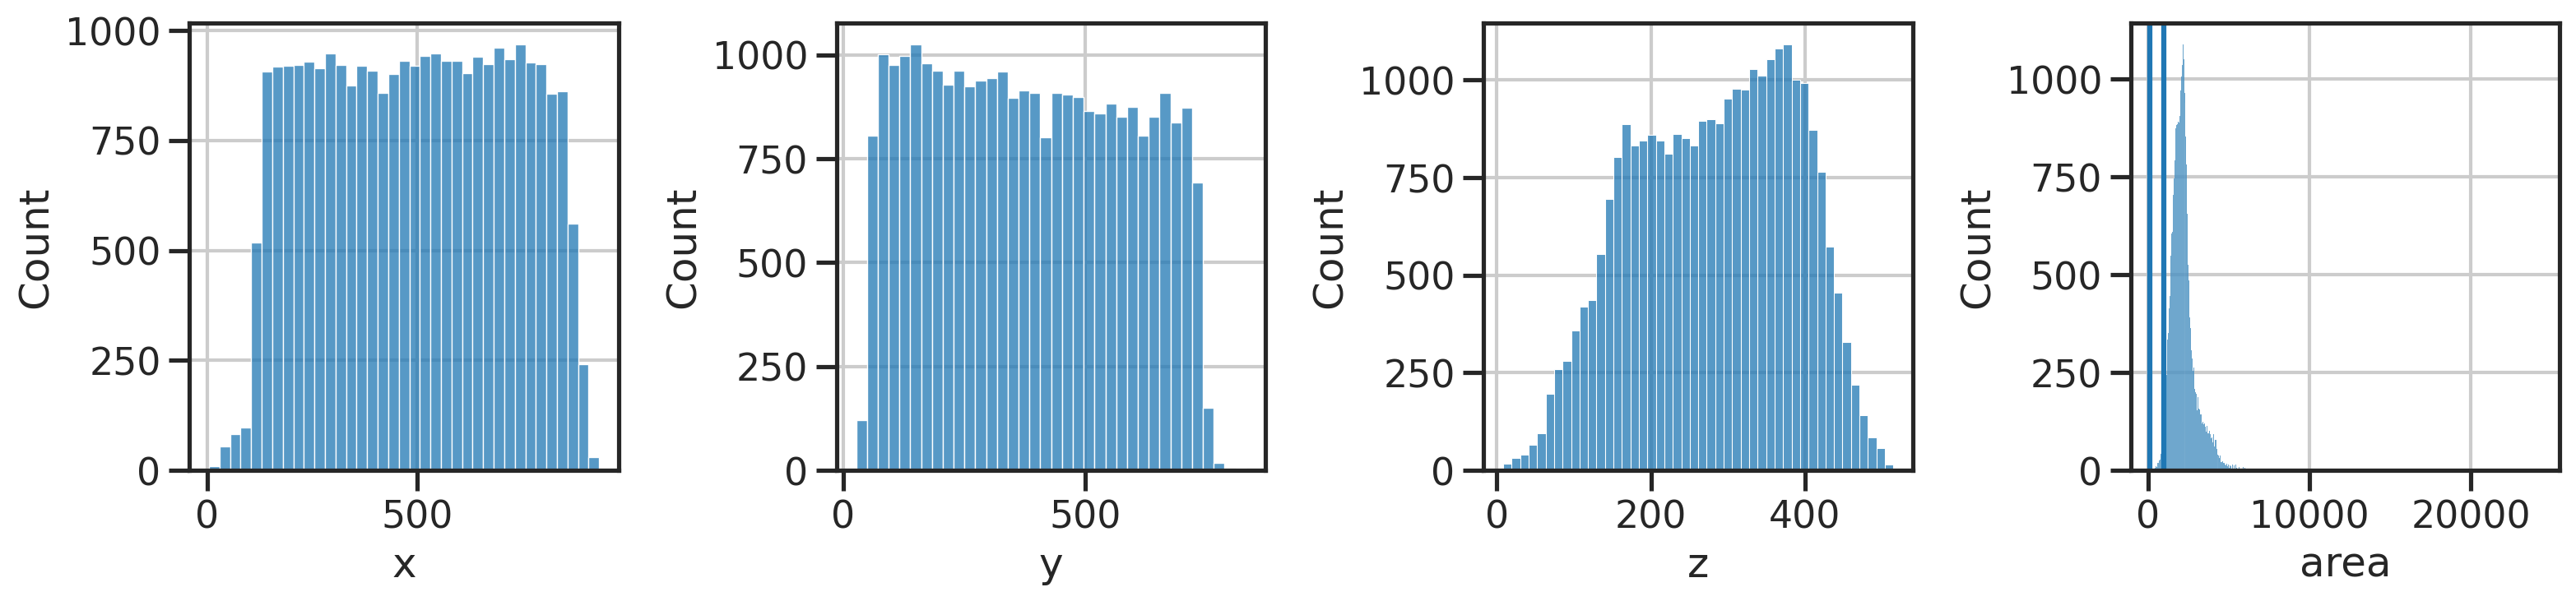

In [6]:
# cell level stats
fig, axs = plt.subplots(1,4,figsize=(4*4,1*4))
ax = axs[0]
sns.histplot(df['x'].values, ax=ax)
ax.set_xlabel('x')
ax = axs[1]
sns.histplot(df['y'].values, ax=ax)
ax.set_xlabel('y')
ax = axs[2]
sns.histplot(df['z'].values, ax=ax)
ax.set_xlabel('z')
ax = axs[3]
sns.histplot(df['area'].values, ax=ax)
ax.set_xlabel('area')
ax.axvline(100)
ax.axvline(1000)
fig.tight_layout()
plt.show()

In [7]:
channels = [
    'r1_c0',  'r1_c2',
]
genes = [
    'RL (Cre)',
    'LM (FlpO)',
]

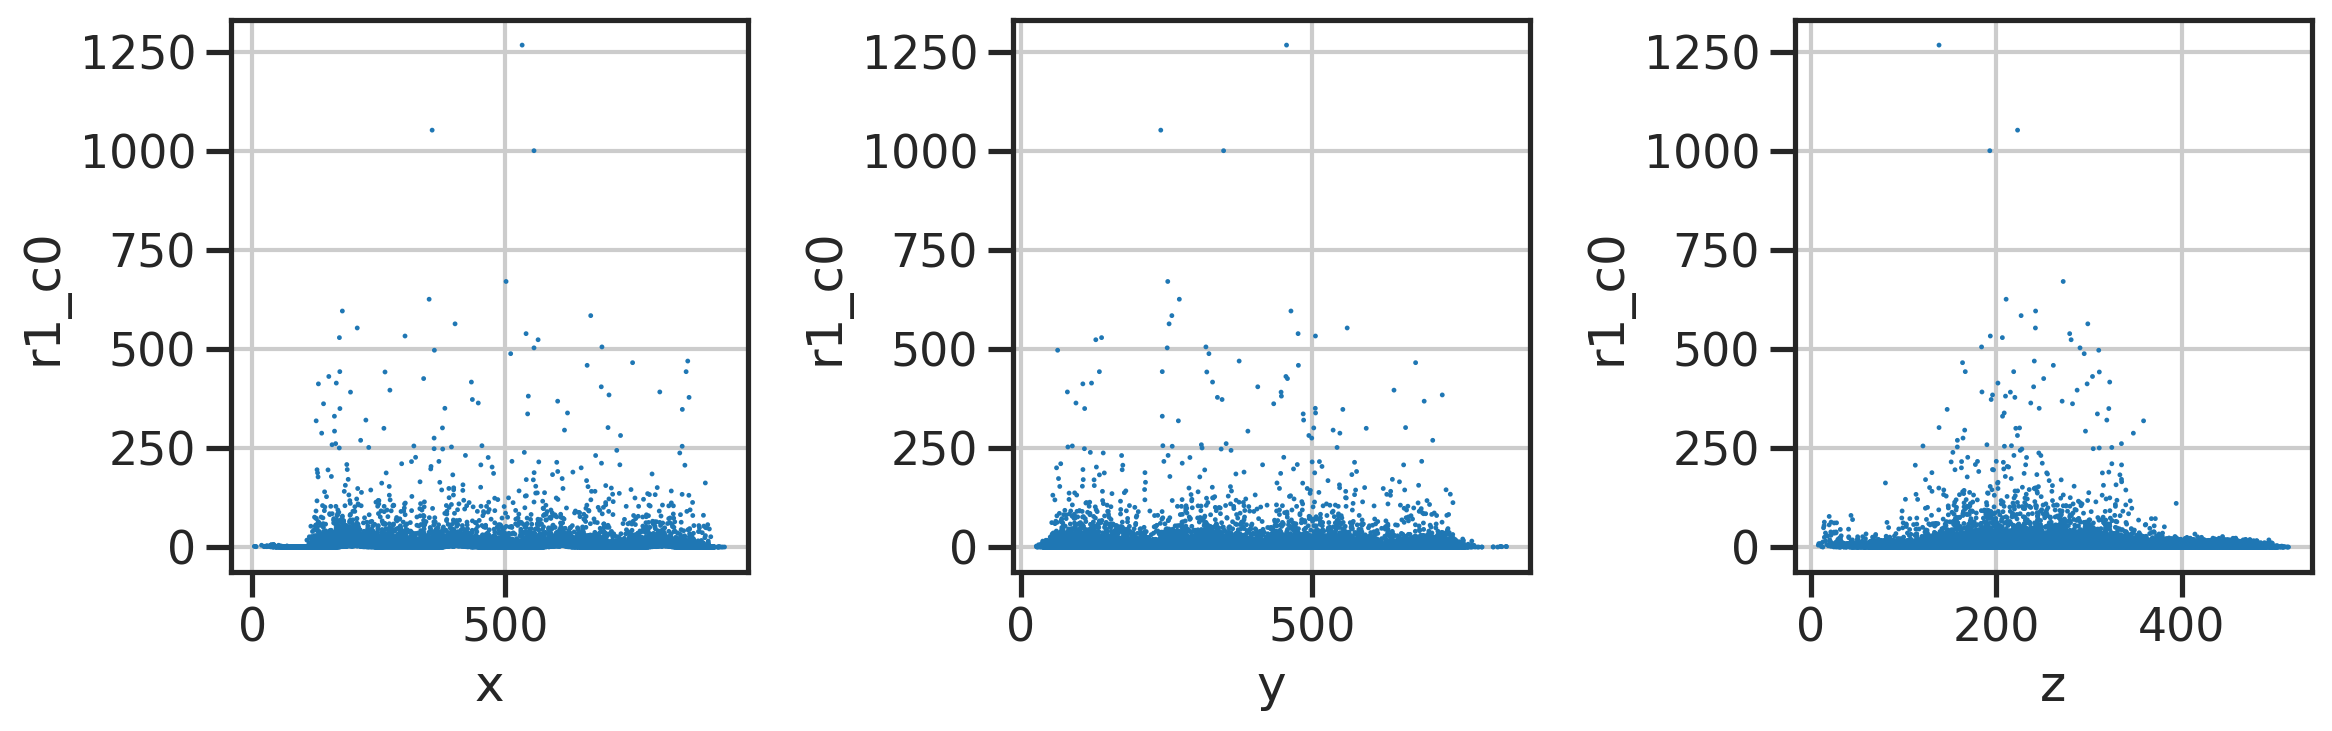

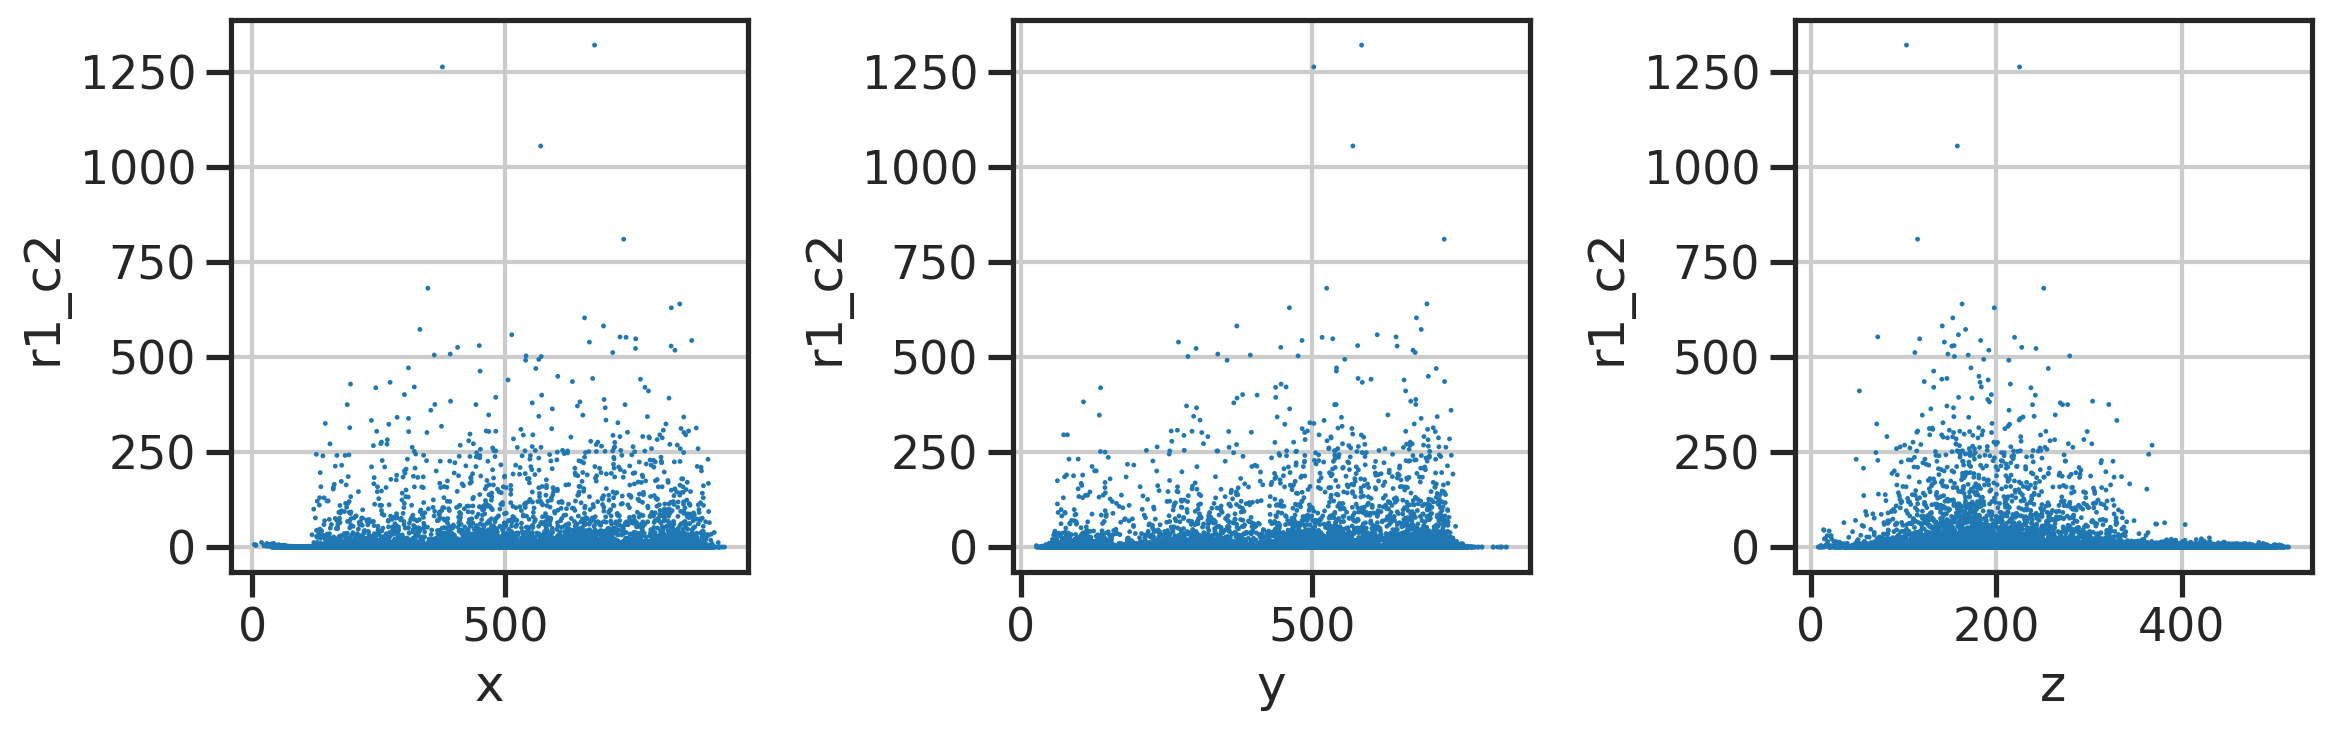

In [8]:
# cell level stats
for ch in channels: 
    fig, axs = plt.subplots(1,3,figsize=(3*4,1*4))
    ax = axs[0]
    sns.scatterplot(data=df, x='x', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('x')

    ax = axs[1]
    sns.scatterplot(data=df, x='y', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('y')

    ax = axs[2]
    sns.scatterplot(data=df, x='z', y=ch, ax=ax, s=3, edgecolor='none')
    ax.set_xlabel('z')

    fig.tight_layout()
    plt.show()

In [9]:
df.describe()

z             y             x          area         r1_c0  \
count  28228.000000  28228.000000  28228.000000  28228.000000  28228.000000   
mean     281.813573    386.746988    495.037523   2191.115648      7.274405   
std      103.217046    201.347354    223.580057    820.268179     26.269430   
min        8.210331     26.664865      4.164600    138.640320      0.000000   
25%      198.539928    210.584261    301.616450   1697.099712      0.000000   
50%      289.091231    379.761340    497.651747   2079.249312      2.592553   
75%      366.947154    559.821852    687.928285   2455.000128      7.084745   
max      514.876611    833.382355    933.956930  24304.714560   1267.586117   

              r1_c2  
count  28228.000000  
mean       7.260088  
std       35.877518  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        2.630390  
max     1320.126297

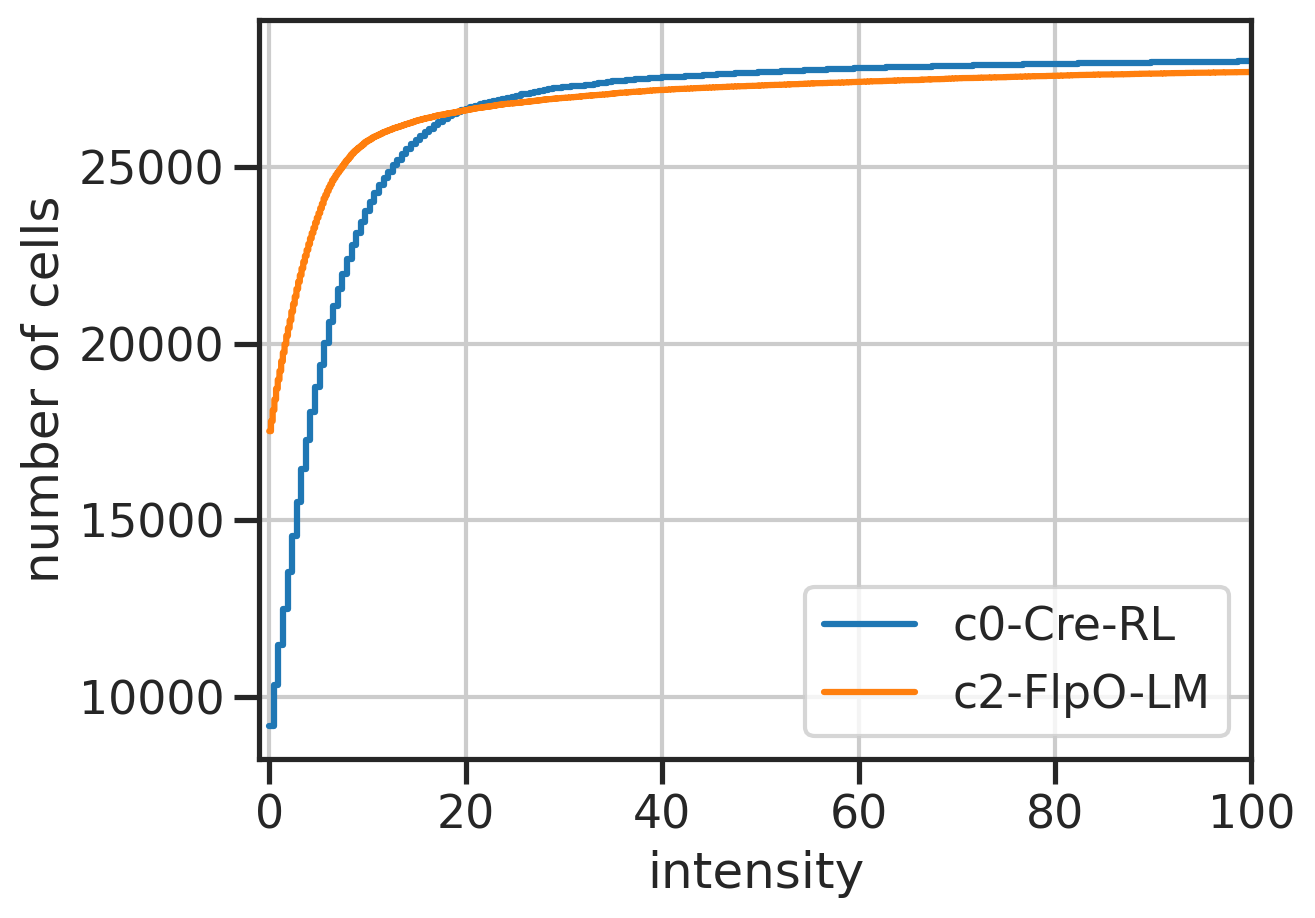

In [18]:
fig, ax = plt.subplots()
sns.histplot(df['r1_c0'].values, cumulative=True, element='step', fill=False, label='c0-Cre-RL', ax=ax)
sns.histplot(df['r1_c2'].values, cumulative=True, element='step', fill=False, label='c2-FlpO-LM', ax=ax)
# ax.axvline(5, linestyle='--', color='k')
# ax.axvline(10, linestyle='--', color='k')
# ax.axvline(30, linestyle='--', color='k')
ax.set_xlim([-1,100])
ax.set_xlabel('intensity')
ax.set_ylabel('number of cells')
ax.legend()

20


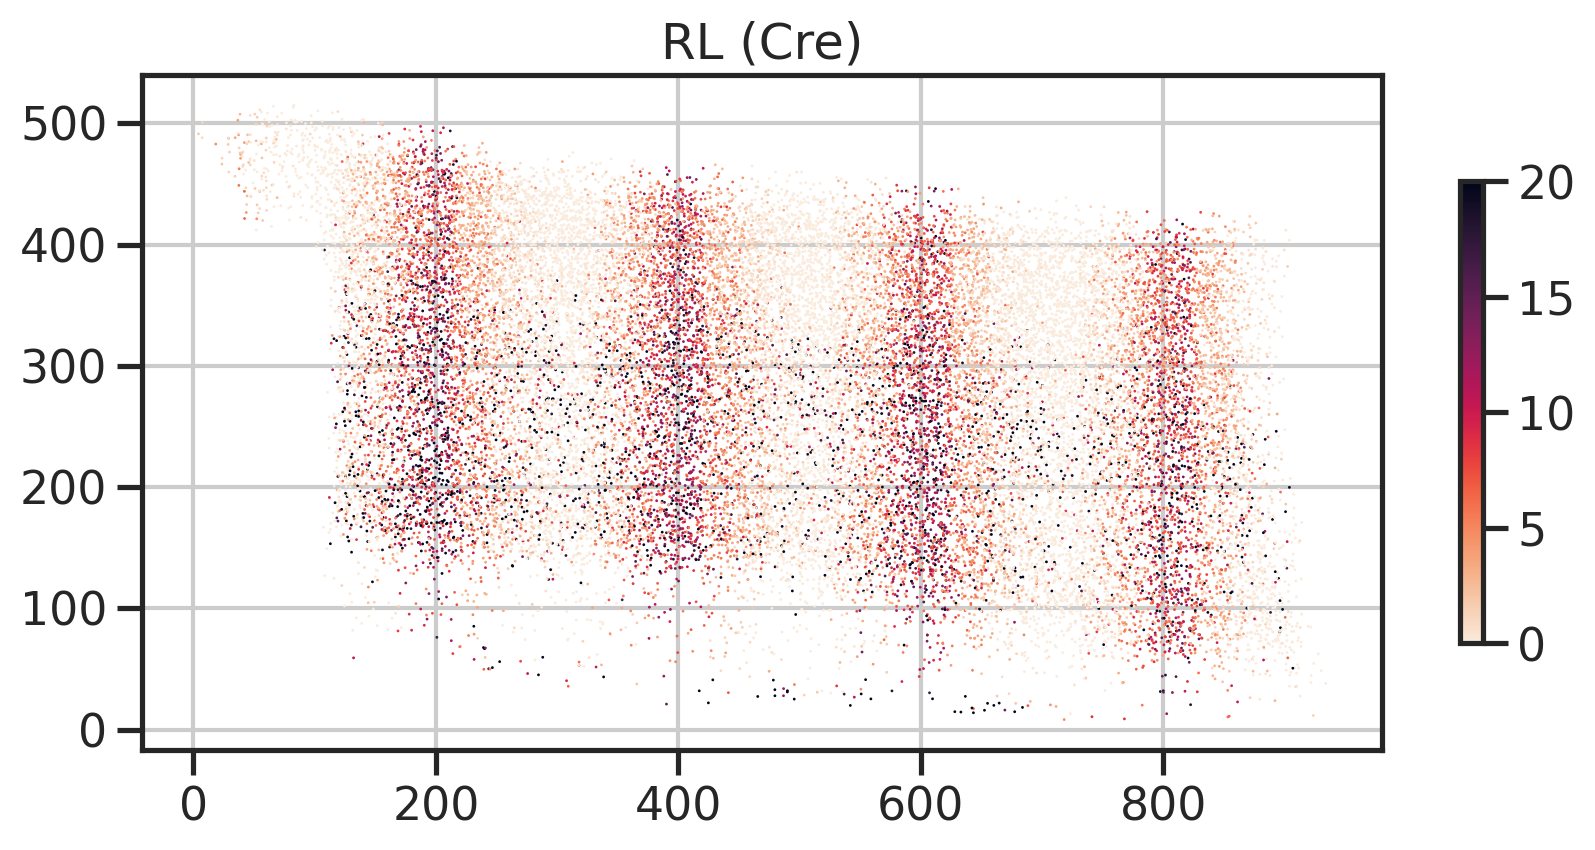

30
965


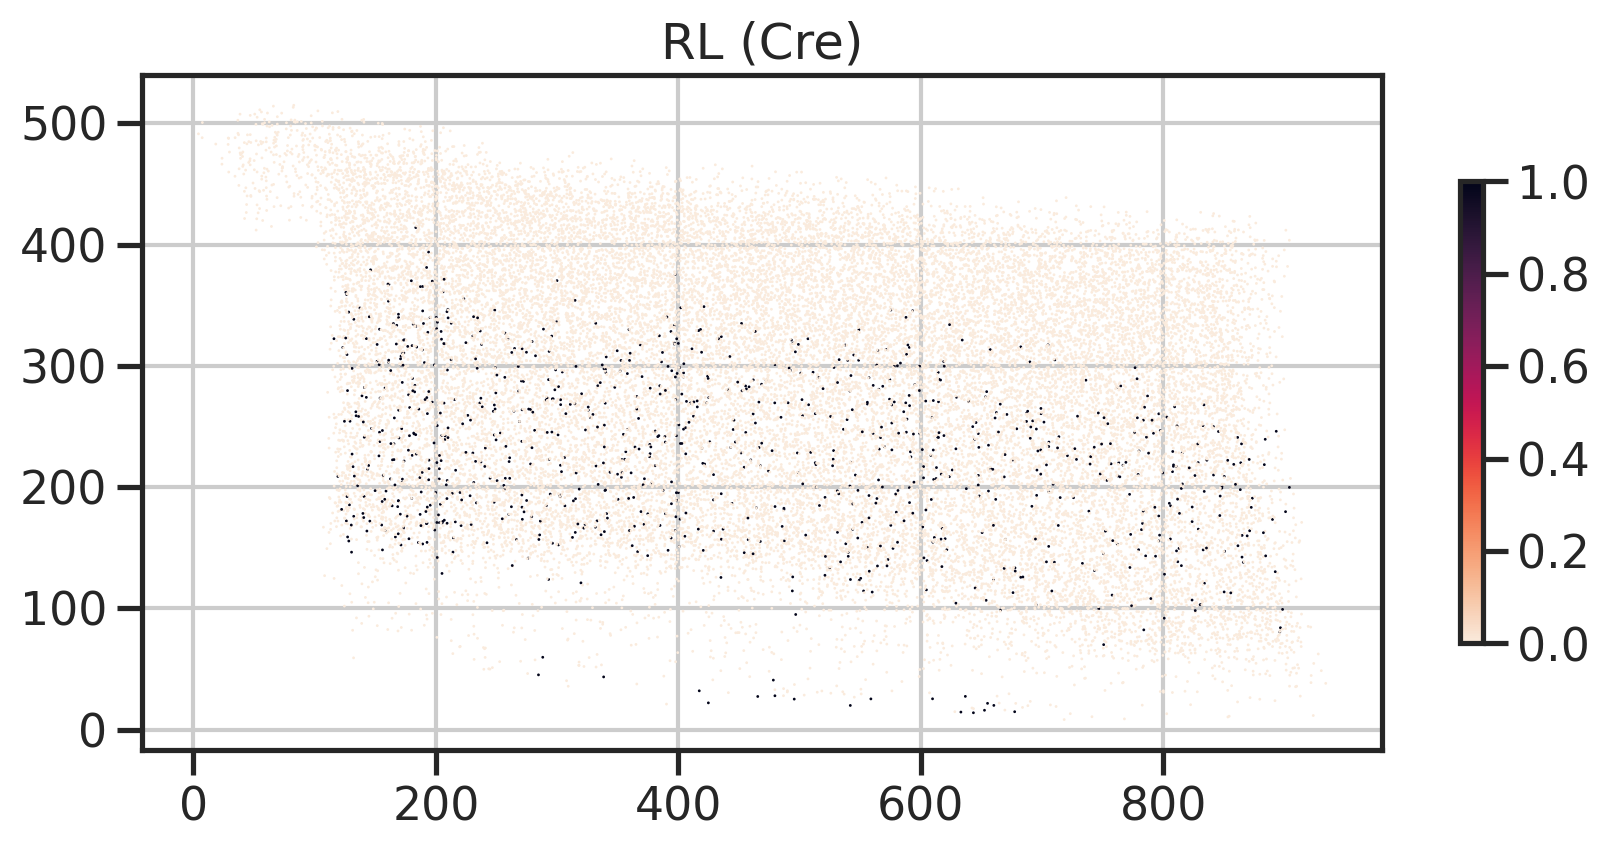

15
2539


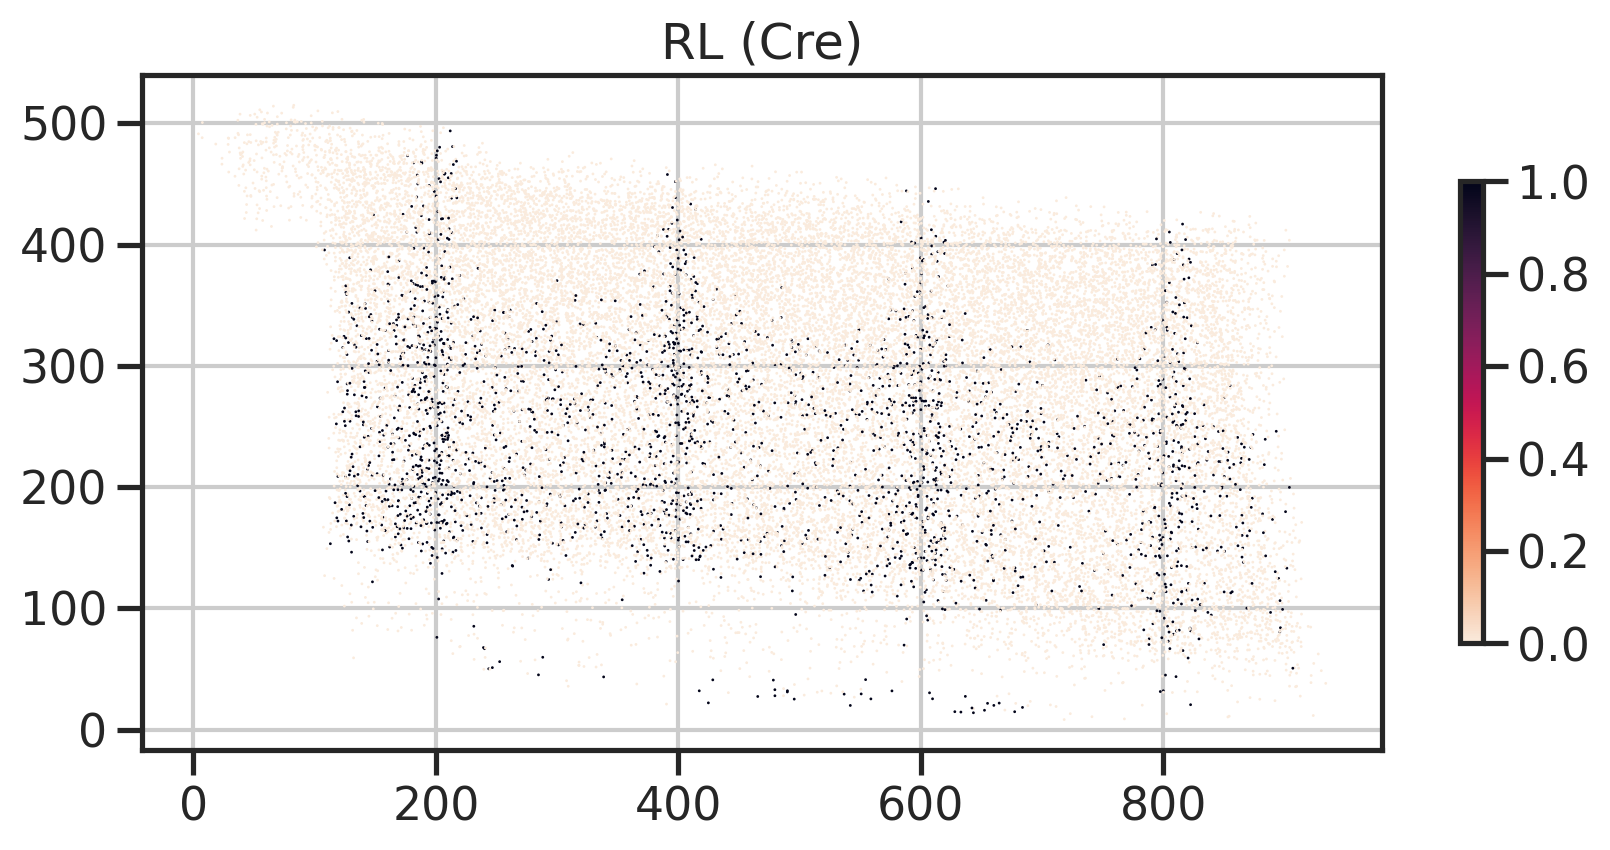

In [29]:
for ch, gene in zip(channels, genes):
    fig, ax = plt.subplots(figsize=(10,10))
    # vmax = np.percentile(df[f'{ch}'], 99.9)
    vmax = 20
    print(vmax)
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}'], s=1, edgecolor='none', 
                   vmax = vmax,
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10,10))
    # vmax = np.percentile(df[f'{ch}'], 99.9)
    vmax = 30
    print(vmax)
    print(np.sum((df[f'{ch}']>vmax)))
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}']>vmax, s=1, edgecolor='none', 
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(10,10))
    # vmax = np.percentile(df[f'{ch}'], 99.9)
    vmax = 15
    print(vmax)
    print(np.sum((df[f'{ch}']>vmax)))
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}']>vmax, s=1, edgecolor='none', 
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()
    
    break

402.7961942385592


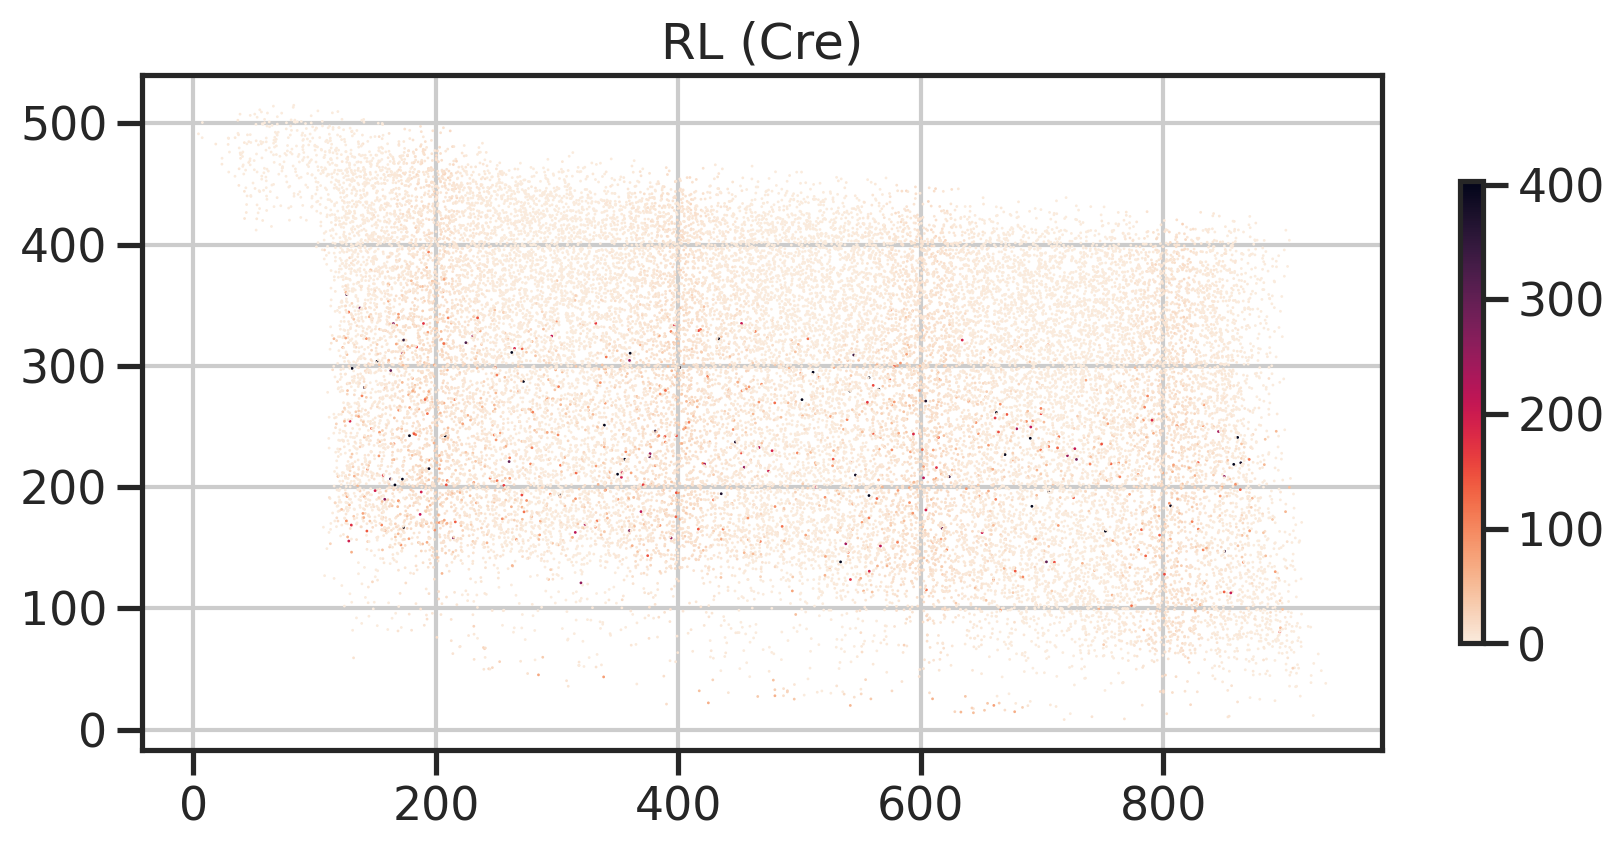

470.8938946578441


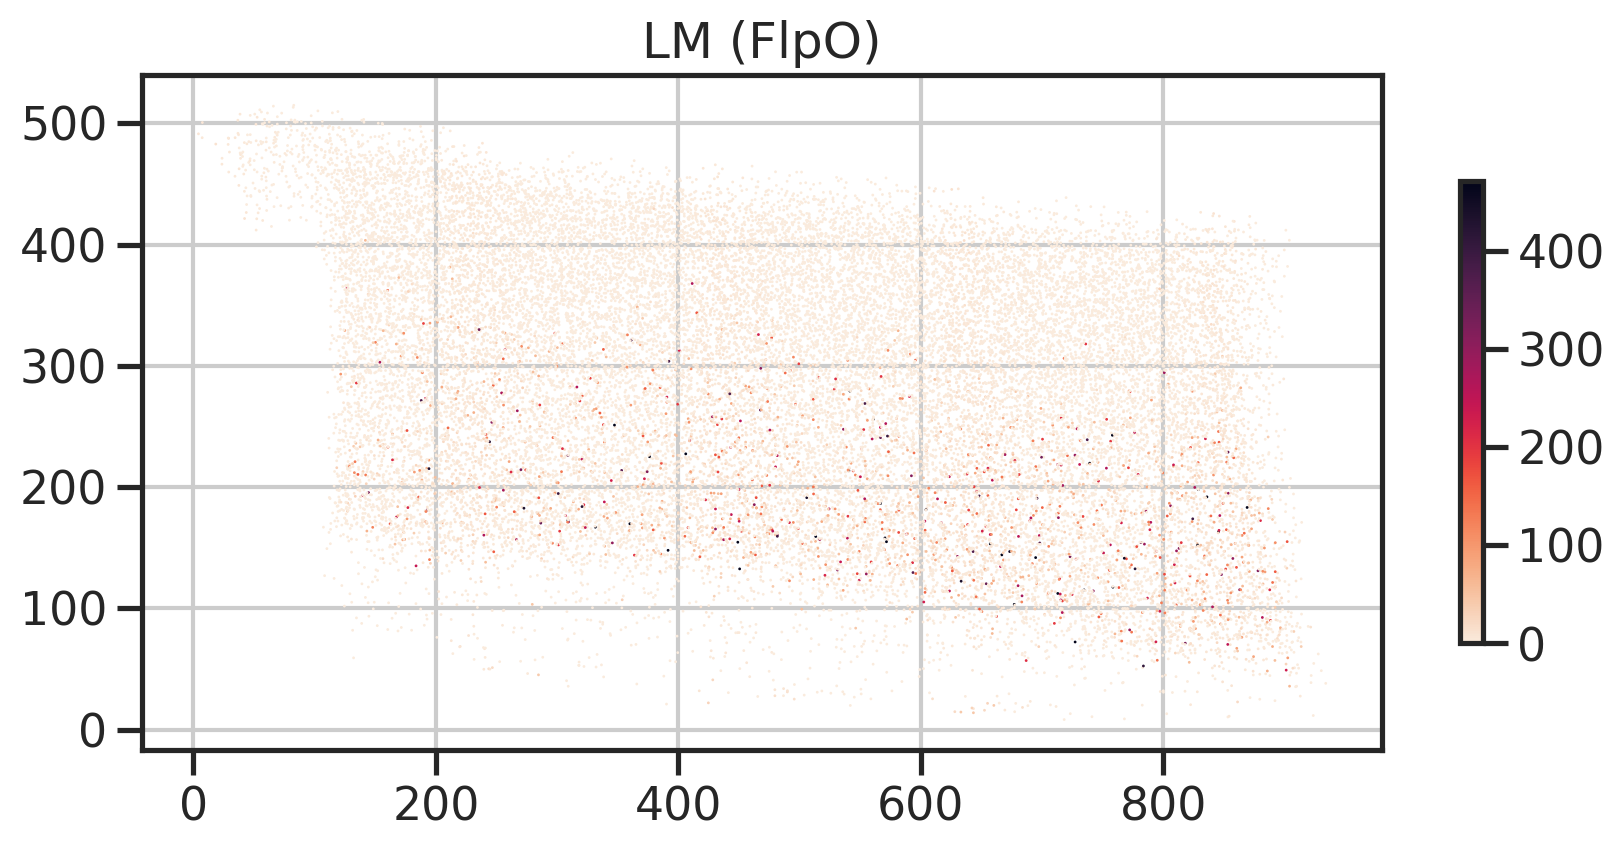

In [19]:
for ch, gene in zip(channels, genes):
    fig, ax = plt.subplots(figsize=(10,10))
    vmax = np.percentile(df[f'{ch}'], 99.9)
    print(vmax)
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'{ch}'], s=1, edgecolor='none', 
                   vmax = vmax,
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
    plt.show()

In [20]:
def rename(code):
    rename_dict = {
        0: 'NA', 
        1: 'RL', 
        2: 'LM', 
        3: 'both'}
    return rename_dict[code]

df = df.copy()
th = 5 
df['bi_r1_c0'] = df['r1_c0'] > th 
df['bi_r1_c2'] = df['r1_c2'] > th 
df['lbl'] = (df['r1_c0'] > th).astype(int) + 2*(df['r1_c2'] > th).astype(int)
df['lbl_v2'] = df['lbl'].apply(rename)
np.unique(df['lbl'].values)
np.unique(df['lbl_v2'].values)


array(['LM', 'NA', 'RL', 'both'], dtype=object)

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(10,5*2))
for ax, ch, gene in zip(axs, channels, genes):
    g = ax.scatter(df['x'].values, df['z'].values, c=df[f'bi_{ch}'], s=3, edgecolor='none', 
               cmap='rocket_r')
    ax.set_title(gene)
    ax.set_aspect('equal')
    fig.colorbar(g, shrink=0.3)
plt.show()

In [14]:
sns.color_palette('tab10', 10)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [15]:
palette = {
    'NA': 'lightgray', 
    'LM': 'C3', 
    'RL': 'C0', 
    'both': 'C6', 
}

In [16]:
df.value_counts('lbl_v2')

lbl_v2
NA      26847
LM        766
RL        403
both       53
dtype: int64

In [24]:
a = df.value_counts('lbl_v2')
print(a/len(df)*100, "\n")

print(f"both in LM (%): {a.loc['both']/(a.loc['both']+a.loc['LM'])*100:.1f}")
print(f"both in RL (%): {a.loc['both']/(a.loc['both']+a.loc['RL'])*100:.1f}")
print(f"RL/LM (%): {(a.loc['both']+a.loc['RL'])/(a.loc['both']+a.loc['LM'])*100:.1f}")

lbl_v2
NA      95.646443
LM       2.728989
RL       1.435748
both     0.188820
dtype: float64 

both in LM (%): 6.5
both in RL (%): 11.6
RL/LM (%): 55.7


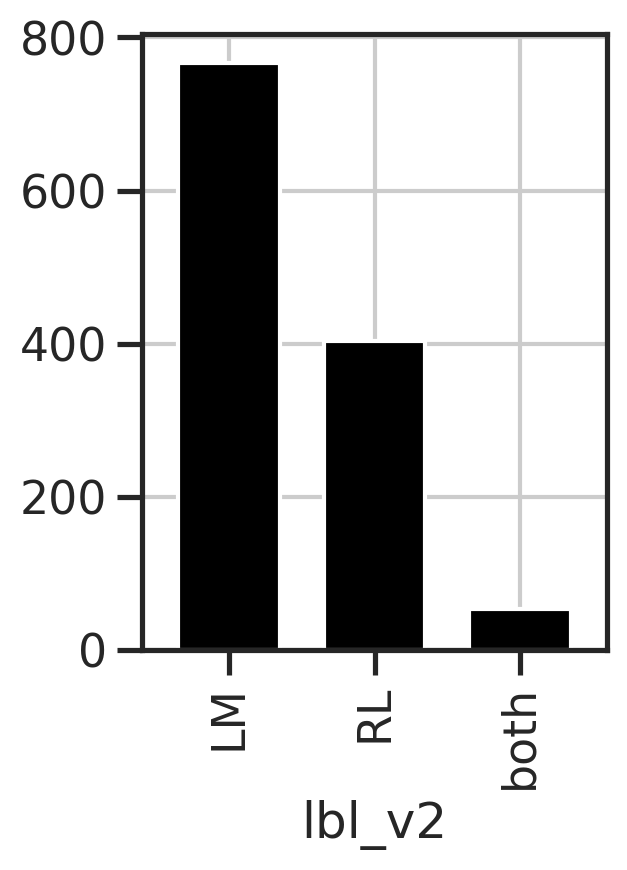

In [18]:
fig, ax = plt.subplots(figsize=(3,4))
df[df['lbl_v2']!='NA'].value_counts('lbl_v2').plot.bar(width=0.7, color='black')
plt.show()

In [19]:
def plot_easifish_proj(data, x, y, hue='lbl_v2', na_rep='NA', invert_yaxis=False, figsize=(8,8)):
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=df, 
                    x=x, y=y, color='lightgray', s=2, edgecolor='none')
    sns.scatterplot(data=df[df[hue]!=na_rep], 
                    x=x, y=y, hue=hue, palette=palette, s=5, edgecolor='none')
    if invert_yaxis:
        ax.invert_yaxis()
        
    ax.grid(False)
    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

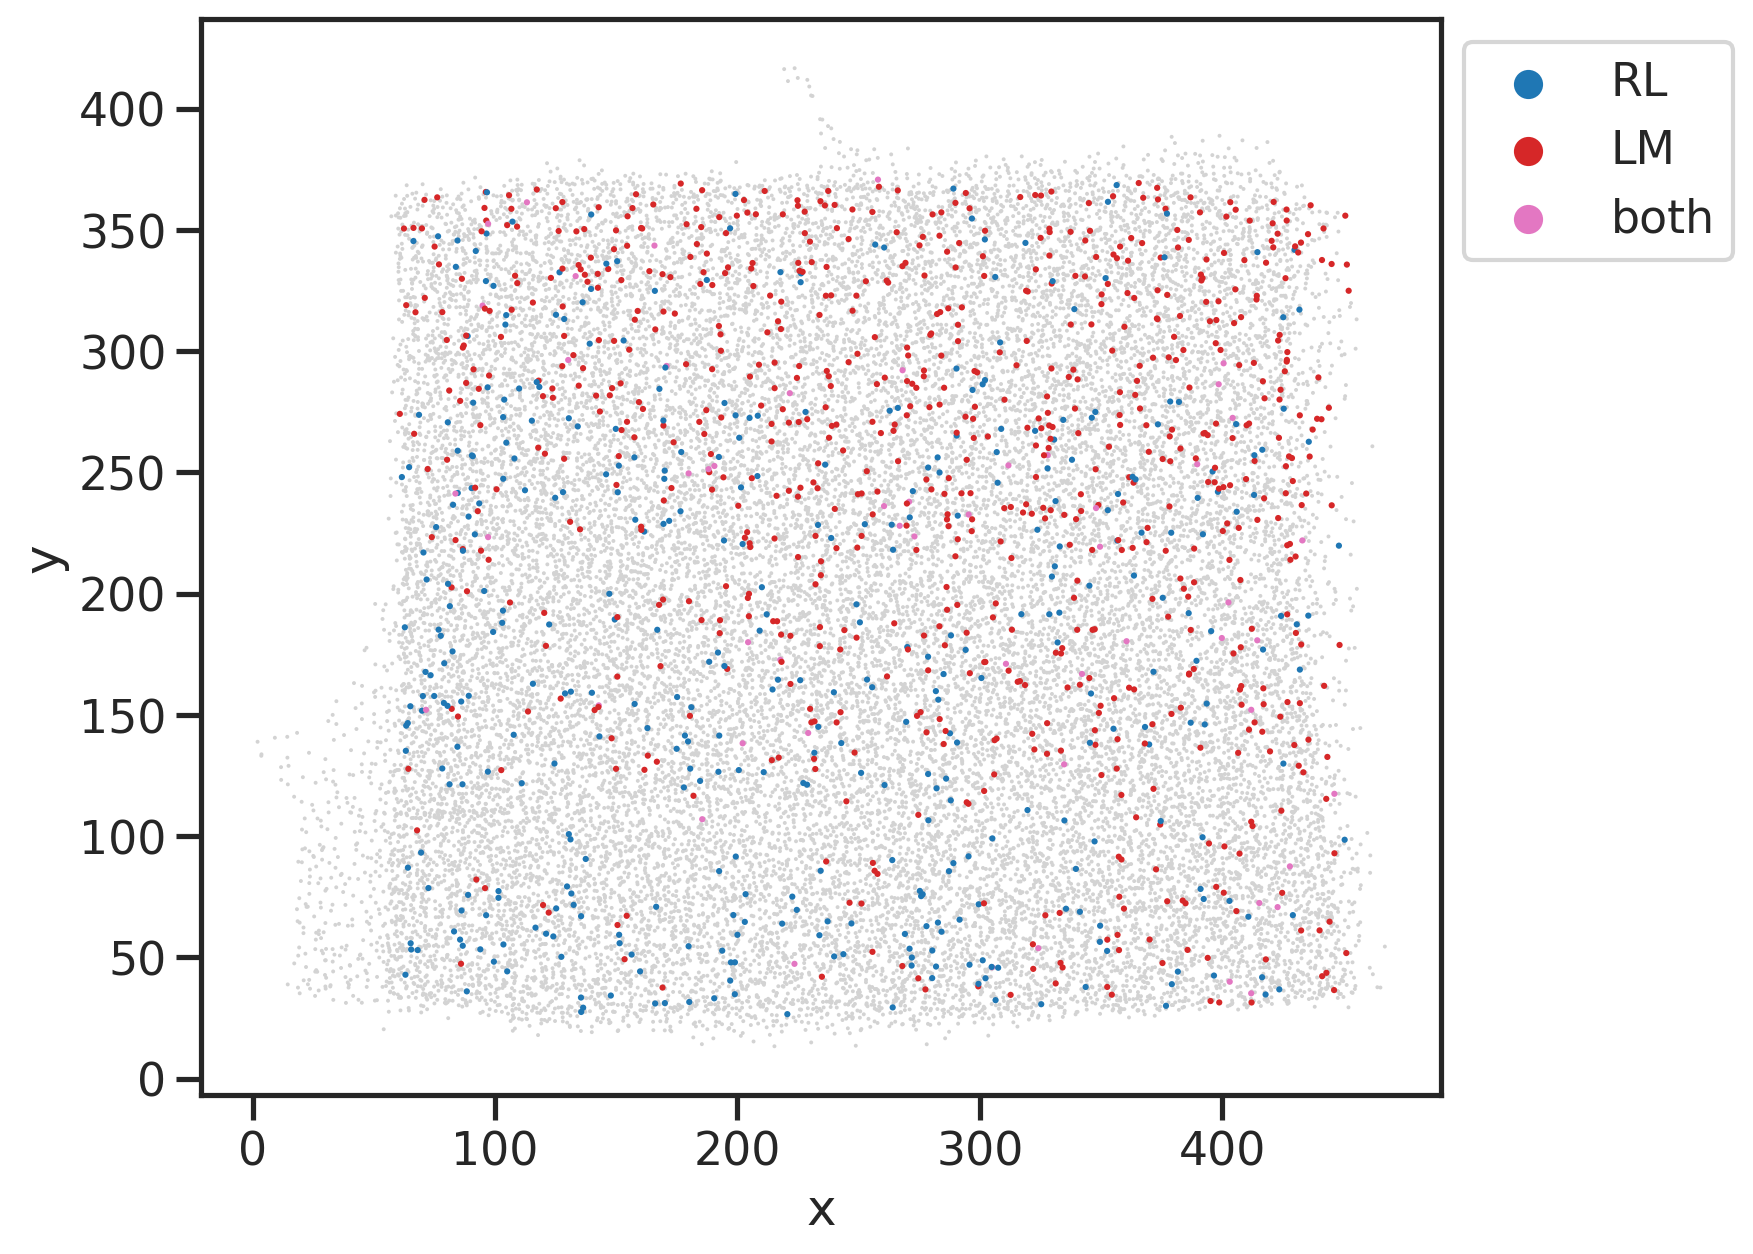

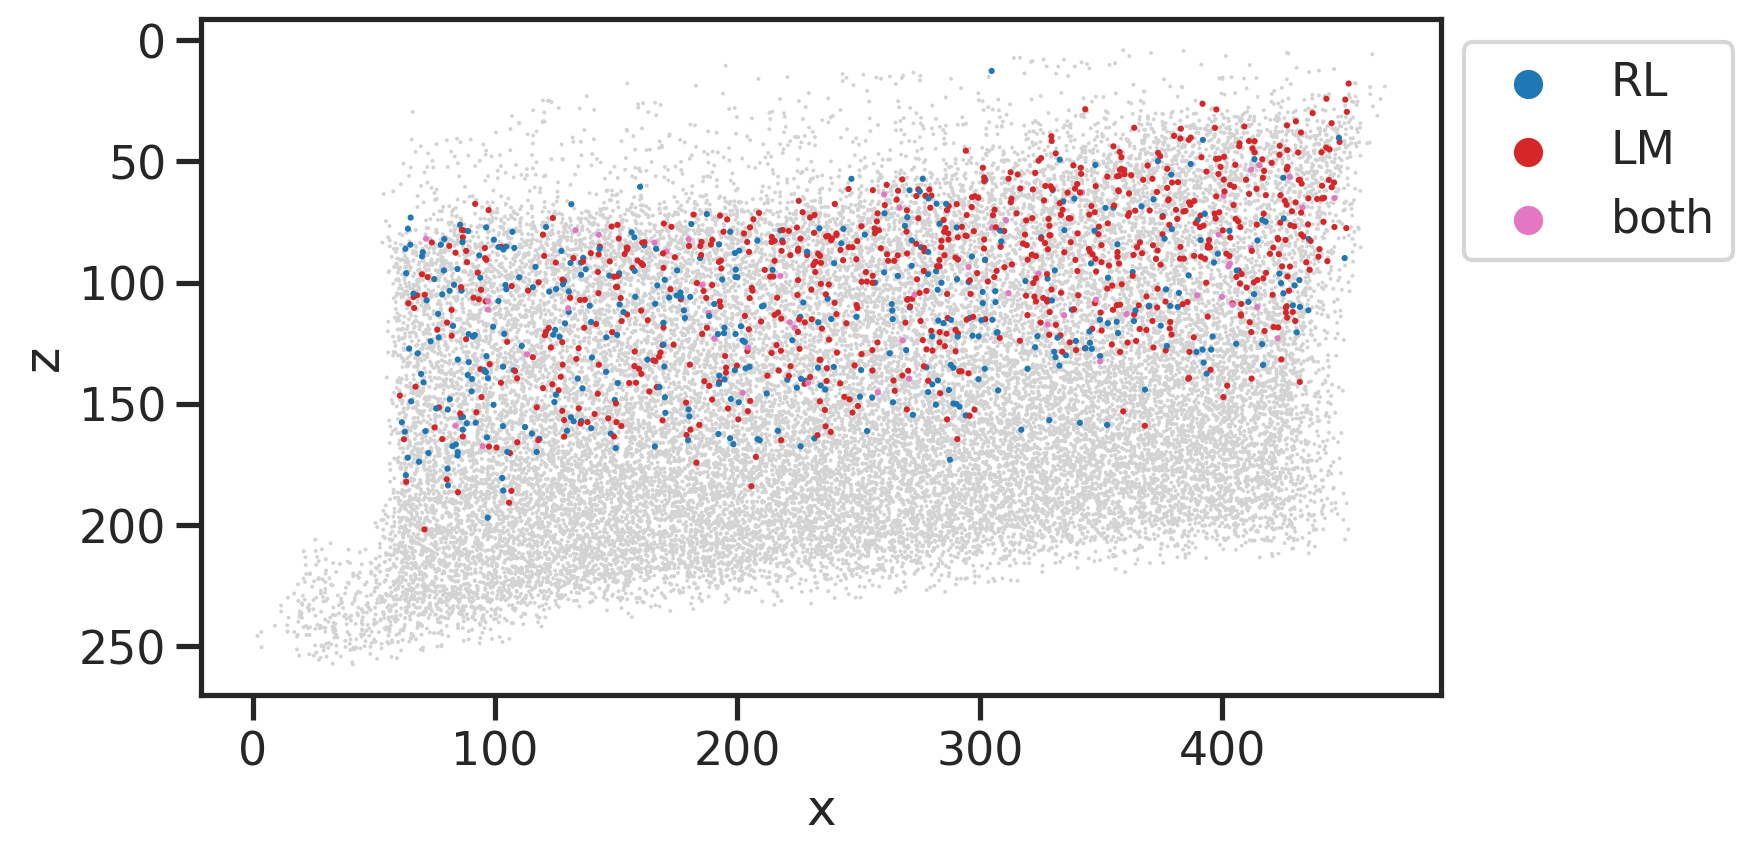

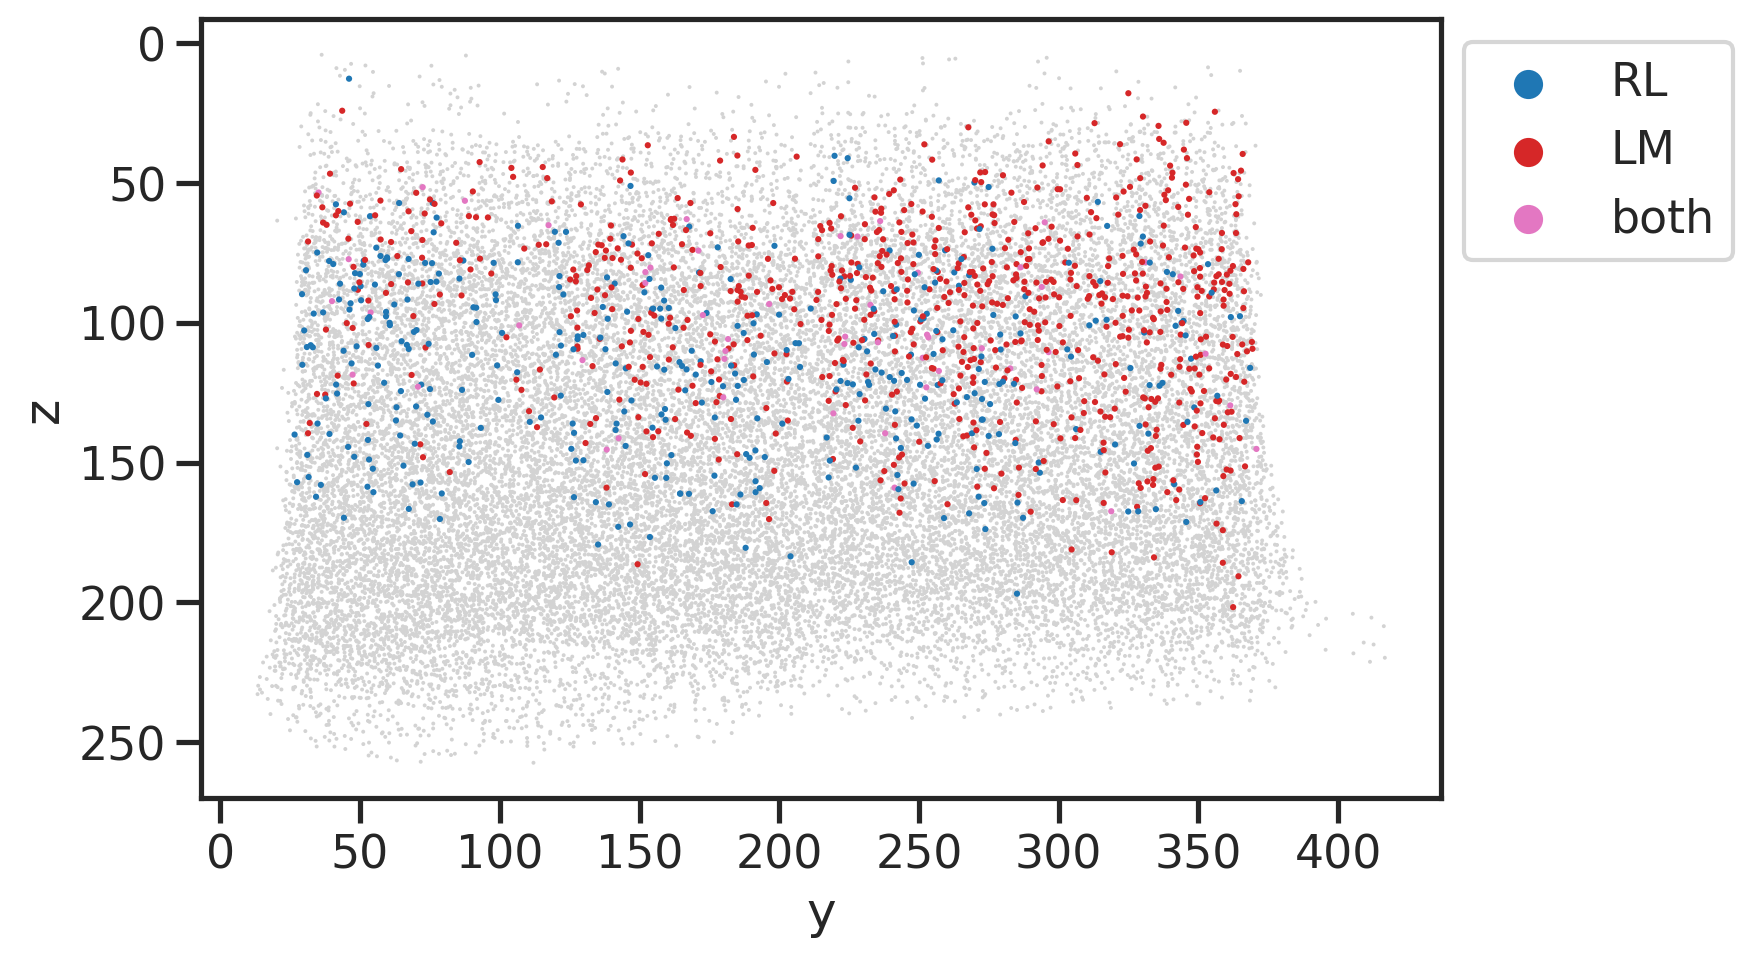

In [20]:
plot_easifish_proj(df, 'x', 'y')
plot_easifish_proj(df, 'x', 'z', invert_yaxis=True)
plot_easifish_proj(df, 'y', 'z', invert_yaxis=True)

In [21]:
fout = "/data/qlyu/v1/results_easifish/lt186_r1_labels_Jun1.csv"
df.to_csv(fout)
!head $fout

roi,z,y,x,area,r1_c0,r1_c1,r1_c2,r1_c4,bi_r1_c0,bi_r1_c2,lbl,lbl_v2
1,111.69084890549918,59.01176187933796,172.86937533368928,332.914512,3.098024943913724,0.0,0.0,0.0,False,False,0,NA
2,84.35620747350808,182.6135006506786,77.6425952779327,478.0424880000001,18.22570973414797,0.0,0.0,0.0,True,False,1,RL
3,177.12589840788473,70.0246247156937,252.4940813747789,351.66650400000003,0.0,0.0,0.0,0.0,False,False,0,NA
4,249.14922099447512,82.84142541436465,32.45630386740332,321.71664000000004,0.0,0.0,0.0,0.0,False,False,0,NA
5,90.54838335748292,35.6618546884703,189.9761912647485,429.340632,2.955263314968615,0.0,0.0,0.0,False,False,0,NA
6,111.2071075799871,74.8185999570539,137.85242860210437,413.876904,0.7678041208294665,0.0,0.0,0.0,False,False,0,NA
7,116.6761403508772,52.40438874965192,262.7038095238095,319.13935200000003,2.2550485351337506,0.909180334905474,0.0,0.0,False,False,0,NA
8,245.15834911242604,76.15871597633137,69.70007100591717,300.38736,0.3077207816706189,0.0,0.0,0.0,False,False,0,NA


# check dimensions - make sure I understand them

#### Load 'n5' image data - cytoDAPI

In [22]:
import zarr

In [23]:
subpath='c3/s3' # channel and scale, full resolution (s0) image can be loaded for detailed inspection
im = zarr.open(store=zarr.N5Store(n5dir), mode='r')
img = im[subpath] ## can also choose to load a subset of the image data
img.shape # z, y, x

(648, 913, 1131)